In [135]:
import requests
import pandas as pd

In [129]:
# Look for the correct database in the IMF stats
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'Dataflow'  # Method with series information
search_term = 'Soundness'  # Term to find in series names
series_list = requests.get(f'{url}{key}').json()\
            ['Structure']['Dataflows']['Dataflow']
# Use dict keys to navigate through results:
for series in series_list:
    if search_term in series['Name']['#text']:
        print(f"{series['Name']['#text']}: {series['KeyFamilyRef']['KeyFamilyID']}")

Financial Soundness Indicators (FSIs): FSI
Financial Soundness Indicators: Reporting entities: FSIRE


In [130]:
# Look for the dimensions of the series
key = 'DataStructure/FSI' 
dimension_list = requests.get(f'{url}{key}').json()\
            ['Structure']['KeyFamilies']['KeyFamily']\
            ['Components']['Dimension']
for n, dimension in enumerate(dimension_list):
    print(f"Dimension {n+1}: {dimension['@codelist']}")

Dimension 1: CL_FREQ
Dimension 2: CL_AREA_FSI
Dimension 3: CL_INDICATOR_FSI


In [194]:
# Find the code for each dimension
key = f"CodeList/{dimension_list[2]['@codelist']}"
code_list = requests.get(f'{url}{key}').json()\
	    ['Structure']['CodeLists']['CodeList']['Code']
for code in code_list:
    print(f"{code['Description']['#text']}: {code['@value']}")

Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Domestic government securities owned (market value), Euros: FS_ODX_GSD_MV_EUR
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Domestic government securities owned (market value), National Currency: FS_ODX_GSD_MV_XDC
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Domestic government securities owned (market value), US Dollars: FS_ODX_GSD_MV_USD
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Gross loans to the public sector, Euros: FS_ODX_AFLG_PS_EUR
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Gross loans to the public sector, National Currency: FS_ODX_AFLG_PS_XDC
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additi

In [204]:
# Specify the requested data
# NPL = FSANL_PT , TCR = FSKRC_PT, T1 =  FSKRTC_PT, NIM = FSEIM_PT, ROA = FSERA_PT, ROE = FSERE_PT, LA7ST = FSLS_PT, 
# LA/TA = FSLT_PT, net open position = FSSNO_PT, 
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'CompactData/FSI/Q.AT.FSANL_PT' # non-performing loans ratio

# Navigate to series in API-returned JSON data
data = (requests.get(f'{url}{key}').json()
        ['CompactData']['DataSet']['Series'])

print(data['Obs'][-1]) # Print latest observation

{'@TIME_PERIOD': '2019-Q3', '@OBS_VALUE': '1.6549973507495'}


In [205]:
# Create pandas dataframe from the observations
data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')]
             for obs in data['Obs']]

df = pd.DataFrame(data_list, columns=['date', 'value'])
     
df = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')

# Save cleaned dataframe as a csv file
df.to_csv('AT_Tier1.csv', header=True)
print(df)

date
2010-01-01    2.279504
2010-04-01    2.413387
2010-07-01    2.580078
2010-10-01    2.830717
2011-01-01    2.724025
2011-04-01    2.740218
2011-07-01    2.655801
2011-10-01    2.706816
2012-01-01    2.724723
2012-04-01    2.754793
2012-07-01    2.728541
2012-10-01    2.813365
2013-01-01    2.798461
2013-04-01    2.815004
2013-07-01    2.899146
2013-10-01    2.866542
2014-01-01    3.806272
2014-04-01    4.098871
2014-07-01    3.947649
2014-10-01    3.473374
2015-01-01    3.807189
2015-04-01    3.580743
2015-07-01    3.460369
2015-10-01    3.392837
2016-01-01    3.300678
2016-04-01    3.170717
2016-07-01    3.096327
2016-10-01    2.695217
2017-01-01    2.579762
2017-04-01    2.530654
2017-07-01    2.478814
2017-10-01    2.368895
2018-01-01    2.261679
2018-04-01    2.118793
2018-07-01    2.050375
2018-10-01    1.882429
2019-01-01    1.819279
2019-04-01    1.702844
2019-07-01    1.654997
Name: value, dtype: float64


Text(0.5, 0, 'Most recent: July 2019: 1.7; Source: IMF FSI')


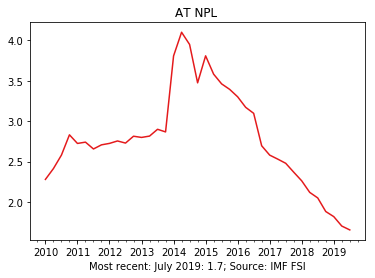

In [206]:
# Visual inspection of the data
title = f'AT NPL '
recentdt = df.index[-1].strftime('%B %Y')
recentval = round(df[-1], 1)
recent = f'Most recent: {recentdt}: {recentval}'
source = 'Source: IMF FSI'

# Basic plot
plot = df.plot(title=title, colormap='Set1')
plot = plot.set_xlabel(f'{recent}; {source}')
print(plot)